In [21]:
#This is taken inspiration from https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In [1]:
# importing neccessary packages
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
# importing dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [3]:
california_housing.frame.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [6]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
# Create a DataFrame named df_housing using the california_housing data and column names
df_housing = pd.DataFrame(california_housing.data,columns = california_housing.feature_names)

In [8]:
# Setting 'MEDV' as the target
df_housing['MEDV'] = california_housing.target

<Axes: >

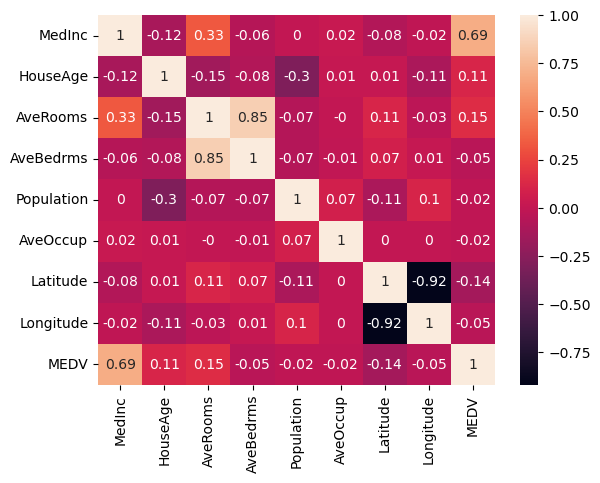

In [9]:
# Heatmap to see what is useful in working out prices
correlation_matrix = df_housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

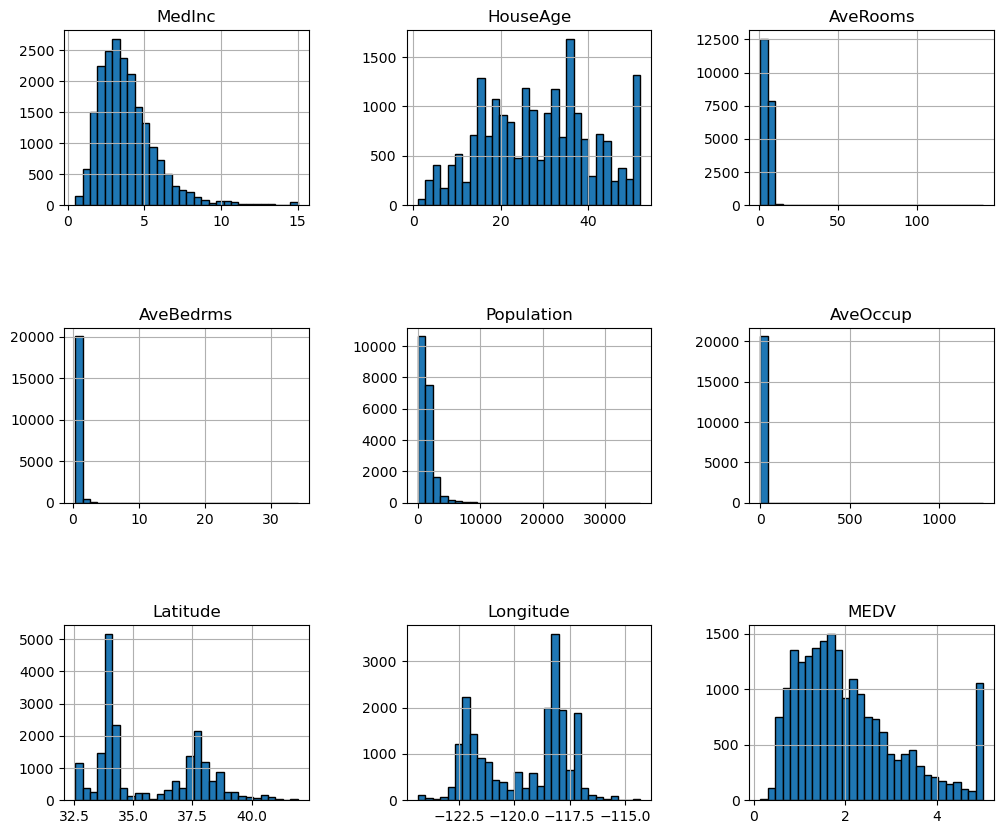

In [10]:
df_housing.hist(figsize=(12,10), bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [11]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
df_housing[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


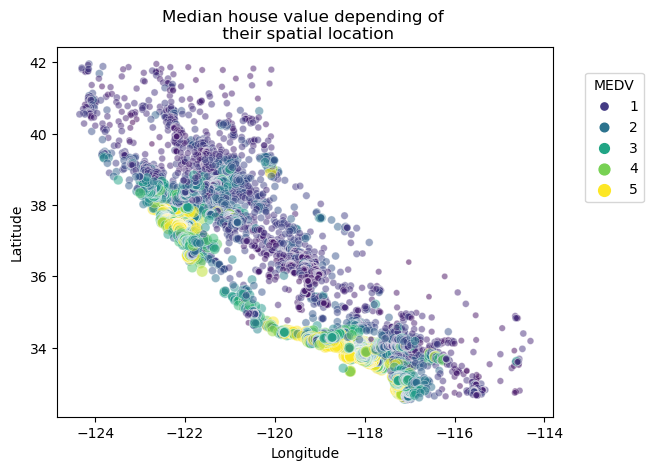

In [12]:
sns.scatterplot(data=df_housing, x="Longitude", y ="Latitude",
               size="MEDV", hue="MEDV",
               palette="viridis",alpha=0.5)
plt.legend(title="MEDV", bbox_to_anchor=(1.05,0.95),
          loc="upper left")
_ = plt.title("Median house value depending of \n their spatial location")

In [13]:
# Dropping unneccessary columns seen from heatmap
df_housing = df_housing.drop('Longitude',axis=1)
df_housing = df_housing.drop('Latitude',axis=1)
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [14]:
# Assigning the 'MEDV' column as the target variable Y
Y = df_housing['MEDV']

# Creating the feature matrix X by dropping the 'MEDV' column from df_housing
X = df_housing.drop('MEDV', axis=1)

# Printing the shape of X and Y
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (20640, 6)
Y shape: (20640,)


In [15]:
# Split into the training and test dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (16512, 6)
X_test shape: (4128, 6)
Y_train shape: (16512,)
Y_test shape: (4128,)


In [16]:
# Training our model
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# Test our model!
# model evaluation for training set
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)

print("The model performance for the training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for the testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for the training set
--------------------------------------
RMSE is 0.7809689239737618
R2 score is 0.5377378589466213


The model performance for the testing set
--------------------------------------
RMSE is 0.7911960206980174
R2 score is 0.546279348358484
